
[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Index(['Year', 'Month', 'INFLOW', 'RESERVOIR STORAGE', 'EVAPORATION',
       'RESERVOIR LEVEL', 'RELEASE (OUTFLOW)'],
      dtype='object')
     Year     Month   INFLOW  RESERVOIR STORAGE  EVAPORATION  RESERVOIR LEVEL  \
0  1989.0   January   613.89               2.53          5.1           484.22   
1     NaN  February   640.20               1.84         -9.2           477.17   
2     NaN     March   785.00               0.79        -19.8           462.44   
3     NaN     April  1005.60               0.45        -19.5           455.66   
4     NaN       May  1256.70               0.67        -20.4           460.13   

   RELEASE (OUTFLOW)  
0              583.6  
1              589.3  
2              730.2  
3             1338.8  
4             1839.6  
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 6291076.0000 - mae: 1928.6641 - val_loss: 3533761.2500 - val_mae: 1588.6273
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6024250.5000 - mae: 1848.2295 - val_loss: 3533248.5000 - val_mae: 1588.4998
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6654215.5000 - mae: 1959.5200 - val_loss: 3532579.5000 - val_mae: 1588.3423
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5924984.5000 - mae: 1847.0533 - val_loss: 3531767.0000 - val_mae: 1588.1475
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5924861.0000 - mae: 1848.5261 - val_loss: 3530728.5000 - val_mae: 1587.8940
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6569712.5000 - mae: 1901.9573 - val_loss: 3529385.7500 - val_mae: 1587.5647
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5723747.5000 - mae: 1850.0673 - val_loss: 3527706.5000 - val_mae: 1587.1555
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5864155.0000 - mae: 18

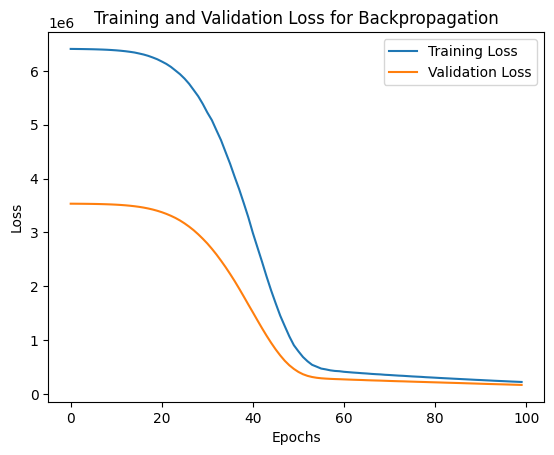

In [4]:
# Install required libraries (if needed)
!pip install pandas scikit-learn openpyxl matplotlib

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf # type: ignore
from tensorflow import keras # type: ignore
from tensorflow.keras import layers # type: ignore

# Load the dataset (adjust path as needed)
data = pd.read_excel('./data/Dataset.xlsx', sheet_name='Scenario3')

# Clean column names by stripping any extra spaces
data.columns = data.columns.str.strip()

# Print column names to check
print(data.columns)

# Select relevant columns for prediction
selected_columns = data[['INFLOW', 'RESERVOIR STORAGE', 'EVAPORATION', 'RESERVOIR LEVEL', 'RELEASE (OUTFLOW)']]

# Show the first few rows of the data to understand its structure
print(data.head())

# Features (X) and target variable (y)
X = data[['INFLOW', 'EVAPORATION', 'RESERVOIR LEVEL', 'RESERVOIR STORAGE', 'RELEASE (OUTFLOW)']]  # independent variables
y = data['RELEASE (OUTFLOW)']  # dependent variable (target)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Artificial Neural Network (ANN) model
model = keras.Sequential()

# Input layer and first hidden layer (you can adjust the number of neurons)
model.add(layers.Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Additional hidden layers (optional, more layers for better representation)
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))

# Output layer (since we're predicting a continuous value, use linear activation)
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model (backpropagation happens during training)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, you can plot the loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for Backpropagation')
plt.show()
